<a href="https://colab.research.google.com/github/fadel-hasan/linear_regression_multi_varible/blob/main/MultiVariable_Regression_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pwd

'/content'

In [3]:
%cd 'drive/MyDrive'

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


'/content/drive/MyDrive'

In [4]:
%%writefile multiData.txt
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500
1940,4,239999
2000,3,347000
1890,3,329999
4478,5,699900
1268,3,259900
2300,4,449900
1320,2,299900
1236,3,199900
2609,4,499998
3031,4,599000
1767,3,252900
1888,2,255000
1604,3,242900
1962,4,259900
3890,3,573900
1100,3,249900
1458,3,464500
2526,3,469000
2200,3,475000
2637,3,299900
1839,2,349900
1000,1,169900
2040,4,314900
3137,3,579900
1811,4,285900
1437,3,249900
1239,3,229900
2132,4,345000
4215,4,549000
2162,4,287000
1664,2,368500
2238,3,329900
2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500

Writing multiData.txt


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
path = 'multiData.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [49]:
#show data
print('data = ')
print(data.head(10) )
print()
print('data.describe = ')
print(data.describe())

data = 
   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500

data.describe = 
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [50]:
# rescaling data =>[-1,1]
# because range number is very hight
data = (data - data.mean()) / (data.max() - data.min())

In [51]:
print()
print('data after normalization = ')
print(data.head(10) )


data after normalization = 
       Size  Bedrooms     Price
0  0.028494 -0.042553  0.112240
1 -0.110502 -0.042553 -0.019835
2  0.110127 -0.042553  0.053938
3 -0.161247 -0.292553 -0.204552
4  0.275598  0.207447  0.376391
5 -0.004325  0.207447 -0.076439
6 -0.128704 -0.042553 -0.048137
7 -0.158213 -0.042553 -0.266818
8 -0.171175 -0.042553 -0.242288
9 -0.139735 -0.042553 -0.184741


In [52]:
# add ones column
data.insert(0, 'Ones', 1) # for theta0


# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

print('**************************************')
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )
print('**************************************')

**************************************
X data = 
    Ones      Size  Bedrooms
0     1  0.028494 -0.042553
1     1 -0.110502 -0.042553
2     1  0.110127 -0.042553
3     1 -0.161247 -0.292553
4     1  0.275598  0.207447
5     1 -0.004325  0.207447
6     1 -0.128704 -0.042553
7     1 -0.158213 -0.042553
8     1 -0.171175 -0.042553
9     1 -0.139735 -0.042553
y data = 
       Price
0  0.112240
1 -0.019835
2  0.053938
3 -0.204552
4  0.376391
5 -0.076439
6 -0.048137
7 -0.266818
8 -0.242288
9 -0.184741
**************************************


In [53]:
# convert to matrices and initialize theta
X2 = np.matrix(X.values)
y2 = np.matrix(y.values)
theta2 = np.matrix(np.zeros((1,X2.shape[1])))


print('X2 \n',X2)
print('X2.shape = ' , X2.shape)
print('**************************************')
print('theta2 \n',theta2)
print('theta2.shape = ' , theta2.shape)
print('**************************************')
print('y2 \n',y2)
print('y2.shape = ' , y2.shape)
print('**************************************')


X2 
 [[ 1.00000000e+00  2.84939738e-02 -4.25531915e-02]
 [ 1.00000000e+00 -1.10502165e-01 -4.25531915e-02]
 [ 1.00000000e+00  1.10126627e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.61246787e-01 -2.92553191e-01]
 [ 1.00000000e+00  2.75598221e-01  2.07446809e-01]
 [ 1.00000000e+00 -4.32455904e-03  2.07446809e-01]
 [ 1.00000000e+00 -1.28704041e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.58213141e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.71175083e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.39735480e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.67349286e-02  2.07446809e-01]
 [ 1.00000000e+00 -1.87769185e-04 -4.25531915e-02]
 [ 1.00000000e+00 -3.05242281e-02 -4.25531915e-02]
 [ 1.00000000e+00  6.83209914e-01  4.57446809e-01]
 [ 1.00000000e+00 -2.02063114e-01 -4.25531915e-02]
 [ 1.00000000e+00  8.25480278e-02  2.07446809e-01]
 [ 1.00000000e+00 -1.87722242e-01 -2.92553191e-01]
 [ 1.00000000e+00 -2.10888266e-01 -4.25531915e-02]
 [ 1.00000000e+00  1.67765899e-01  2.07446809e-01]
 [ 1.00000000e+00  2.84147

In [54]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [55]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


In [83]:
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 1000

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
cost = computeCost(X2, y2, g2)


print('g2 = ' , g2)
print('cost2  = ' , cost2[0:50] )
print('computeCost = ' , cost)
print('**************************************')


g2 =  [[-2.77112848e-17  8.84672224e-01  1.93720488e-02]]
cost2  =  [0.02701376 0.02679228 0.02657354 0.02635751 0.02614415 0.02593343
 0.02572532 0.02551978 0.02531677 0.02511628 0.02491826 0.02472268
 0.02452952 0.02433873 0.0241503  0.02396419 0.02378037 0.02359882
 0.02341949 0.02324237 0.02306743 0.02289464 0.02272397 0.02255539
 0.02238889 0.02222442 0.02206197 0.02190151 0.02174302 0.02158646
 0.02143182 0.02127908 0.02112819 0.02097916 0.02083194 0.02068651
 0.02054286 0.02040097 0.0202608  0.02012234 0.01998556 0.01985045
 0.01971698 0.01958513 0.01945488 0.01932621 0.01919911 0.01907354
 0.0189495  0.01882696]
computeCost =  0.007378769144255799
**************************************


In [84]:
# get best fit line for Size vs. Price

x = np.linspace(data.Size.min(), data.Size.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)


x 
 [-0.31679009 -0.30668908 -0.29658807 -0.28648706 -0.27638605 -0.26628504
 -0.25618403 -0.24608302 -0.235982   -0.22588099 -0.21577998 -0.20567897
 -0.19557796 -0.18547695 -0.17537594 -0.16527493 -0.15517392 -0.14507291
 -0.1349719  -0.12487089 -0.11476988 -0.10466887 -0.09456786 -0.08446685
 -0.07436584 -0.06426483 -0.05416382 -0.04406281 -0.0339618  -0.02386079
 -0.01375978 -0.00365877  0.00644224  0.01654325  0.02664426  0.03674527
  0.04684628  0.05694729  0.0670483   0.07714931  0.08725032  0.09735133
  0.10745234  0.11755335  0.12765436  0.13775537  0.14785638  0.15795739
  0.1680584   0.17815941  0.18826042  0.19836143  0.20846244  0.21856345
  0.22866446  0.23876547  0.24886648  0.25896749  0.2690685   0.27916951
  0.28927052  0.29937153  0.30947254  0.31957355  0.32967456  0.33977557
  0.34987658  0.35997759  0.3700786   0.38017961  0.39028062  0.40038163
  0.41048264  0.42058365  0.43068466  0.44078567  0.45088668  0.46098769
  0.4710887   0.48118971  0.49129072  0.5013917

Text(0.5, 1.0, 'Size vs. Price')

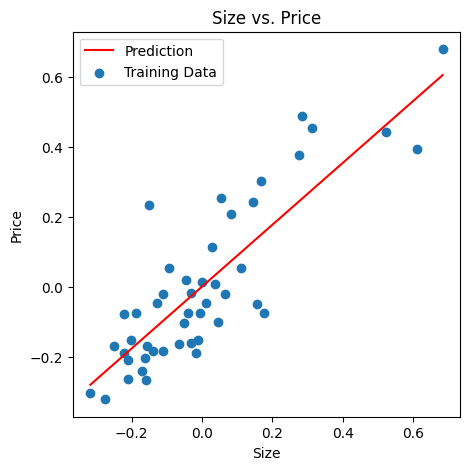

In [85]:
# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')



In [86]:
# get best fit line for Bedrooms vs. Price

x = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 2] * x)
print('f \n',f)


x 
 [-0.54255319 -0.53245218 -0.52235117 -0.51225016 -0.50214915 -0.49204814
 -0.48194713 -0.47184612 -0.46174511 -0.4516441  -0.44154309 -0.43144208
 -0.42134107 -0.41124006 -0.40113905 -0.39103804 -0.38093703 -0.37083602
 -0.36073501 -0.350634   -0.34053299 -0.33043198 -0.32033097 -0.31022996
 -0.30012895 -0.29002794 -0.27992693 -0.26982592 -0.25972491 -0.2496239
 -0.23952289 -0.22942188 -0.21932087 -0.20921986 -0.19911885 -0.18901784
 -0.17891683 -0.16881582 -0.15871481 -0.1486138  -0.13851279 -0.12841178
 -0.11831077 -0.10820976 -0.09810875 -0.08800774 -0.07790673 -0.06780572
 -0.05770471 -0.0476037  -0.03750269 -0.02740168 -0.01730067 -0.00719966
  0.00290135  0.01300236  0.02310337  0.03320438  0.04330539  0.0534064
  0.06350741  0.07360842  0.08370943  0.09381044  0.10391145  0.11401247
  0.12411348  0.13421449  0.1443155   0.15441651  0.16451752  0.17461853
  0.18471954  0.19482055  0.20492156  0.21502257  0.22512358  0.23522459
  0.2453256   0.25542661  0.26552762  0.27562863 

Text(0.5, 1.0, 'Bedrooms vs. Price')

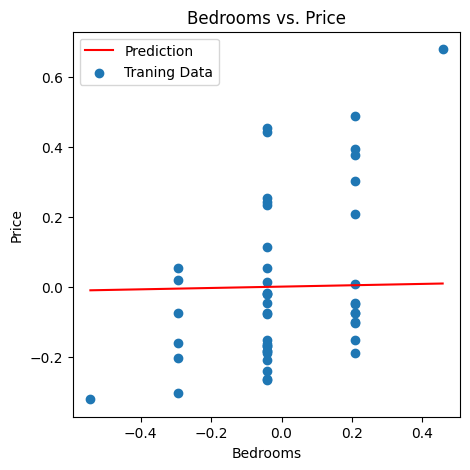

In [90]:

# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Bedrooms, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Bedrooms vs. Price')


Text(0.5, 1.0, 'Error vs. Training Epoch')

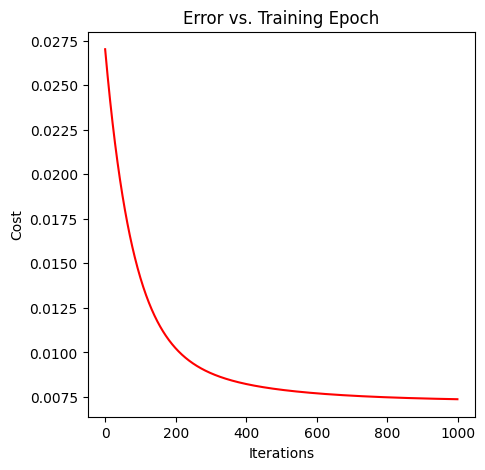

In [88]:

# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')




#3D graph

In [113]:
x_surf, y_surf = np.meshgrid(np.linspace(data.Size.min(), data.Size.max(), 100),np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100))
fittedY = g2[0,0] + g2[0,1] * x_surf + g2[0,2] * y_surf

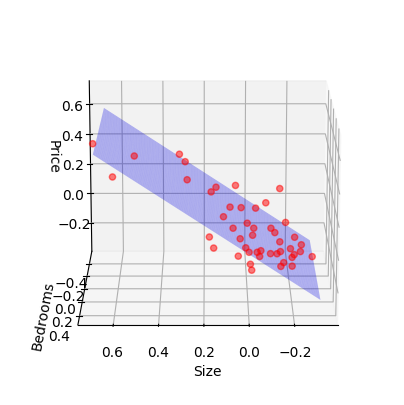

In [117]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(5,5))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Size'],data['Bedrooms'],data['Price'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY, color='b', alpha=0.3)
ax.view_init(15,90)
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

In [126]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data['Size'],
    y=data['Bedrooms'],
    z=data['Price'],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.5),
     hovertemplate='Size X: %{x}<br>' +
                  'Bedrooms Y: %{y}<br>' +
                  'Price Z: %{z}<br>'+
                  '<extra></extra>'
))

fig.add_trace(go.Surface(
    x=x_surf,
    y=y_surf,
    z=fittedY,
    colorscale='Blues',
    opacity=0.3
))

fig.update_layout(
    scene=dict(
        xaxis_title='Size',
        yaxis_title='Bedrooms',
        zaxis_title='Price'
    ),
    width=800,
    height=500,
    title='Size and Bedrooms vs Price',
)

fig.show()
